# Benachbarte Zellen zählen

In diesem Notebook visualisieren wir, welche Zellen in einem Gewebe benachbart sind, indem wir ein Netz zeichnen. Darüber hinaus können wir die Intensität des Netzes so ändern, dass sie dem Abstand zwischen den Schwerpunkten der Zellen entspricht.

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
import pandas as pd

# Testdaten
Lassen Sie uns eine gewebeähnliche Struktur erzeugen, die aus Zellen besteht, die typischerweise etwa 6 Nachbarn haben.

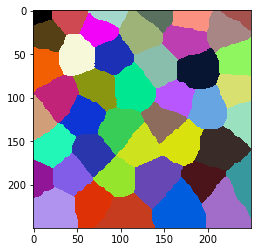

In [2]:
cells = cle.artificial_tissue_2d(
    delta_x=48, 
    delta_y=32, 
    random_sigma_x=7, 
    random_sigma_y=7, 
    width=250, 
    height=250)

cle.imshow(cells, labels=True)

## Netz zwischen benachbarten Zellen

Bevor wir Nachbarn zählen, sollten wir die Nachbarschaftsbeziehungen visualisieren. Wir können dies tun, indem wir ein Netz zwischen den Schwerpunkten benachbarter Zellen zeichnen.

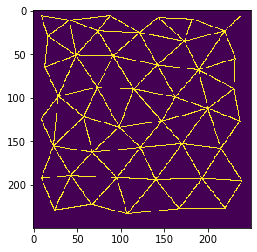

In [3]:
mesh = cle.draw_mesh_between_touching_labels(cells)

cle.imshow(mesh)

Wir können auch beide Visualisierungen in einem Bild kombinieren. Beachten Sie, dass diese Bilder nicht für weitere quantitative Analysen verwendet werden sollten. Sie dienen nur der Visualisierung.

## Schwerpunktverbindungen und Zellgrenzen
Eine gängige Methode zur Visualisierung von Geweben in diesem Zusammenhang besteht darin, Zellgrenzen und das Schwerpunktnetz in verschiedenen Farben zu zeichnen.

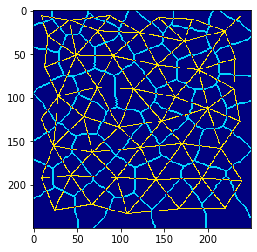

In [4]:
visualization = mesh * 2 + cle.detect_label_edges(cells)

cle.imshow(visualization, color_map='jet')

## Analyse und Visualisierung der Anzahl benachbarter Zellen
Wir können auch die benachbarten Zellen zählen und das Ergebnis als parametrisches Bild in Farben visualisieren.

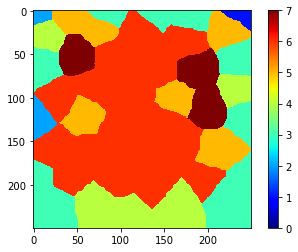

In [5]:
neighbor_count_image = cle.touching_neighbor_count_map(cells)

cle.imshow(neighbor_count_image, color_map='jet', colorbar=True, min_display_intensity=0)

Beachten Sie, dass die Zahlen entlang des Bildrandes möglicherweise nicht genau sind. Daher sollten wir die entsprechenden Zellen von der weiteren Analyse ausschließen.

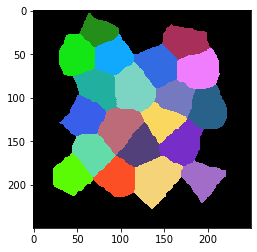

In [6]:
cells_ex_border = cle.exclude_labels_on_edges(cells)

cle.imshow(cells_ex_border, labels=True)

Nach der Korrektur des Labelbildes können wir auch das parametrische Bild korrigieren.

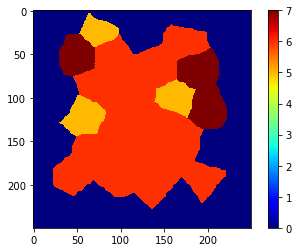

In [7]:
neighbor_count_image_ex_border = neighbor_count_image * (cells_ex_border != 0)

cle.imshow(neighbor_count_image_ex_border, color_map='jet', colorbar=True, min_display_intensity=0)

Jetzt können wir die Anzahl der Nachbarn messen. Wir können entweder einfach diese Zahlen lesen und sie in eine Liste einfügen ...

In [8]:
cle.read_intensities_from_map(cells_ex_border, neighbor_count_image_ex_border)

cl.Array([[0., 5., 6., 7., 6., 6., 7., 6., 6., 5., 5., 6., 6., 7., 6., 6.,
        6., 6., 6., 6., 6.]], dtype=float32)

... oder wir können diese Werte zusammen mit allen anderen Statistiken lesen und sie in einen pandas DataFrame einfügen.

In [9]:
statistics = cle.statistics_of_labelled_pixels(neighbor_count_image_ex_border, cells_ex_border)

table = pd.DataFrame(statistics)

# Spalte umbenennen
table = table.rename(columns={"mean_intensity": "number_of_neighbors"})

# Nur eine Teilmenge aller Spalten herausfiltern; nur das, was uns interessiert
table = table[["label", "number_of_neighbors", "centroid_x", "centroid_y"]]

table

label  number_of_neighbors  centroid_x  centroid_y
0       1                  5.0   74.592697   23.731028
1       2                  6.0  173.741379   35.582230
2       3                  7.0   49.460915   51.928082
3       4                  6.0   91.783768   52.666199
4       5                  6.0  142.728210   62.962471
5       6                  7.0  189.973206   68.526794
6       7                  6.0   73.699181   88.797356
7       8                  6.0  115.321083   90.665649
8       9                  5.0  163.097733   99.824242
9      10                  5.0   58.206852  122.341309
10     11                  6.0   98.847565  134.280228
11     12                  6.0  147.731705  127.326218
12     13                  7.0  200.522903  112.817368
13     14                  6.0   67.880905  162.991592
14     15                  6.0  122.943306  157.515717
15     16                  6.0  171.010025  153.333328
16     17                  6.0   43.426266  189.492981
17     18                  6.0   96.272728  192.326477
18     19                  6.0  140.815964  194.446030
19     20                  6.0  193.817596  193.019318

# Übung
Analysieren Sie ein größeres Sichtfeld mit mehr Zellen und variieren Sie die Parameter `random_sigma_x` und `random_sigma_y` der Funktion `artificial_tissue_2d`. Verwenden Sie eine Karte der Berührungsnachbarnzahl, um die Anzahl der sich berührenden Nachbarn vor und nach der Anwendung eines Medianfilters auf die Karte zu zählen.